## importing libraries

In [1]:
import cv2
import numpy as np
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
from tqdm import tqdm
import pickle
import numpy as np
import matplotlib.pyplot as plt

### Function to add noise into the image. 

In [2]:
def noise(img,snr):
    h=img.shape[0]
    w=img.shape[1]
    img1=img.copy()
    sp=h*w
    NP=int(sp*(1-snr))
    for i in range (NP):
        randx=np.random.randint(1,h-1)
        randy=np.random.randint(1,w-1)
        if np.random.random()<=0.5:
            img1[randx,randy]=0
        else:
            img1[randx,randy]=255
    return img1

100%|███████████████████████████████████| 9000/9000 [00:00<00:00, 246818.94it/s]


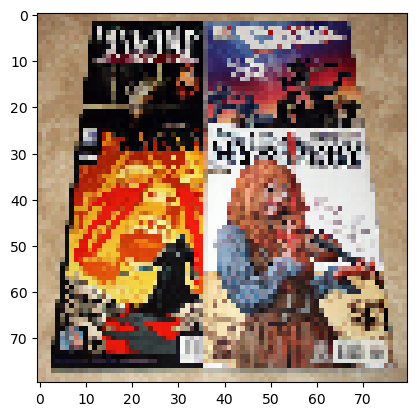

In [5]:
#loading the image set pickled from imagenet dataset

file = open('imagenet_subset.pkl', 'rb')
ds_p = pickle.load(file)
plt.figure()
plt.imshow(ds_p[1])

file.close()

file_noise = open('noise_train.pkl', 'wb') #creating train images with noise
file_blur = open('blur_train.pkl', 'wb') #creating blurred train images 
file_gola = open('blemished_train.pkl', 'wb') #creating blemished images
file_nochange = open('nochange_train.pkl', 'wb') #original images

lst_noise = []
lst_blur = []
lst_gola = []
lst_nochange = []

# adding noise to first 10000 images 
for i in tqdm(ds_p[:10000]):
  noiseImage = noise(i, 0.85)

  lst_noise.append(noiseImage)

#dumping in the pkl file
pickle.dump(lst_noise, file_noise)
file_noise.close()

#blurring next 10000 images

for i in tqdm(ds_p[10000:20000]):
  blurImage = cv2.blur(i,(5,5))

  lst_blur.append(blurImage)
#dumping blurredin the pkl file
pickle.dump(lst_blur, file_blur)

file_blur.close()

#blemishing last 10000 images

for i in tqdm(ds_p[20000:29000]):
  center_coordinates = (64,64)
  radius = 15
  color = (0, 0, 0)
  thickness = -1
  image_new = i.copy()
  image_new = cv2.circle(image_new, center_coordinates, radius, color, thickness)
  lst_gola.append(image_new)

#dumping blemished
pickle.dump(lst_gola, file_gola)

file_gola.close()

 

pickle.dump(lst_nochange, file_nochange)
file_nochange.close()

In [6]:
#loading test images
file_test = open('imagenet_testset.pkl', 'rb')
ds_p_test = pickle.load(file_test)

file_test.close()



file_noise_test = open('noise_test.pkl', 'wb') #noisy test
file_blur_test = open('blur_test.pkl', 'wb') #blury test
file_gola_test = open('blemished_test.pkl', 'wb') #blemished

lst_noise_test = []
lst_blur_test = []
lst_gola_test = []

#adding noise 

for i in tqdm(ds_p_test[0:1001]):
  noiseImage_test = noise(i, 0.85)

  lst_noise_test.append(noiseImage_test)
    
#dump noise test
pickle.dump(lst_noise_test, file_noise_test)
file_noise_test.close()

#blurring images

for i in tqdm(ds_p_test[1001:2001]):
  blurImage_test = cv2.blur(i,(5,5))

  lst_blur_test.append(blurImage_test)
    
#dump blurred images

pickle.dump(lst_blur_test, file_blur_test)

file_blur_test.close()

#blemished images
for i in tqdm(ds_p_test[2001:]):
  center_coordinates = (64,64)
  radius = 15
  color = (0, 0, 0)
  thickness = -1
  image_new_test = i.copy()
  image_new_test = cv2.circle(image_new_test, center_coordinates, radius, color, thickness)
  lst_gola_test.append(image_new_test)
#dump blemished images

pickle.dump(lst_gola_test, file_gola_test)

file_gola_test.close()

100%|█████████████████████████████████████| 999/999 [00:00<00:00, 175479.93it/s]


In [7]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

#load validation images
file_val = open('imagenet_valset.pkl', 'rb')


ds_p_val = pickle.load(file_val)


file_val.close()

file_noise_val = open('noise_val.pkl', 'wb') #noise set
file_blur_val = open('blur_val.pkl', 'wb') #blur set
file_gola_val = open('gola_val.pkl', 'wb') #blemished

lst_noise_val = []
lst_blur_val = []
lst_gola_val = []

#add noise

for i in tqdm(ds_p_val[0:1001]):
  noiseImage_val = noise(i, 0.85)

  lst_noise_val.append(noiseImage_val)
#dump noise
pickle.dump(lst_noise_val, file_noise_val)
file_noise_val.close()
 
#add blurred
for i in tqdm(ds_p_val[1001:2001]):
  blurImage_val = cv2.blur(i,(5,5))

  lst_blur_val.append(blurImage_val)
#dump blurred
pickle.dump(lst_blur_val, file_blur_val)

file_blur_val.close()
#blemish images
for i in tqdm(ds_p_val[2001:]):
  center_coordinates = (64,64)
  radius = 15
  color = (0, 0, 0)
  thickness = -1
  image_new_val = i.copy()
  image_new_val = cv2.circle(image_new_val, center_coordinates, radius, color, thickness)
  lst_gola_val.append(image_new_val)

#dump blemished images
pickle.dump(lst_gola_val, file_gola_val)

file_gola_val.close()

100%|██████████████████████████████████████| 999/999 [00:00<00:00, 66414.80it/s]


#### Sample blemished

9000


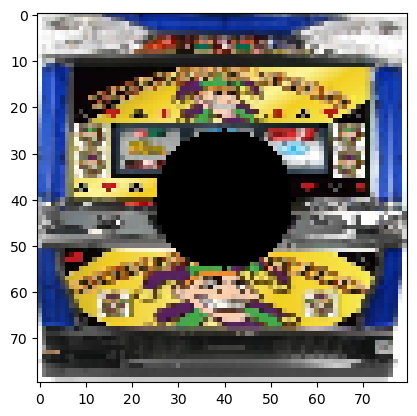

In [8]:
file4 = open('blemished_train.pkl', 'rb')
ds_n = pickle.load(file4)
print(len(ds_n))
plt.imshow(ds_n[990])

#### Sample noisy image

1000


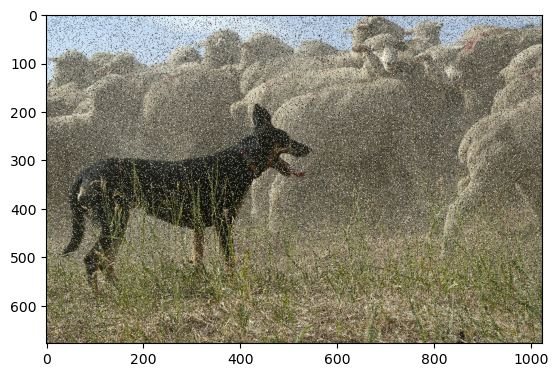

In [17]:
file5 = open('noise_test.pkl', 'rb')
ds_n = pickle.load(file5)
print(len(ds_n))
plt.imshow(ds_n[0])

#### Sample blurred image

999


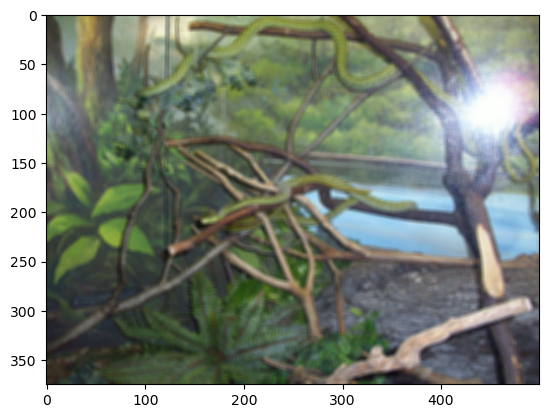

In [16]:
file6 = open('blur_test.pkl', 'rb')
ds_n = pickle.load(file6)
print(len(ds_n))
plt.imshow(ds_n[5])